<a href="https://colab.research.google.com/github/jinwoongokRe/AI_basic_study/blob/master/new_practice/predict_zip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
cd /content/drive/MyDrive/20210101_엽서우편번호

/content/drive/MyDrive/20210101_엽서우편번호


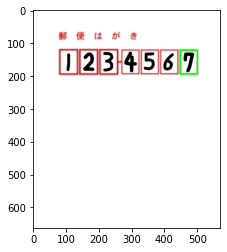

In [16]:
import cv2
import matplotlib.pyplot as plt

#엽서 이미지에서 우편 번호를 추출하는 함수
def detect_zipno(fname):
  img = cv2.imread(fname)
  #이미지 크기 구하기
  h, w = img.shape[:2]
  #이미지의 오른쪽 윗부분만 추출하기(*1)
  img = img[0:h//2, w//3:]

  #이미지 이진화하기(*2)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray = cv2.GaussianBlur(gray, (3,3), 0)
  im2 = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)[1]

  #윤곽 검출하기(*3)
  cnts = cv2.findContours(im2, 
                          cv2.RETR_LIST,
                          cv2.CHAIN_APPROX_SIMPLE)[0]
  
  #추출한 이미지에서 윤곽 추출하기 (*4)
  result = []
  for pt in cnts:
    x, y, w, h = cv2.boundingRect(pt)
    # 너무 크거나 너무 작은 부분 제거하기 (*5)
    if not(50 < w < 70) : continue
    result.append([x,y,w,h])
    #추출한 윤곽을 위치에 따라 정렬하기(*6)
    result = sorted(result, key=lambda x : x[0])
    #추출한 윤곽이 너무 가까운 것들 제거하기 (*7)
    result2=[]
    lastx = -100
    for x, y, w, h in result:
      if(x - lastx) < 10 : continue
      result2.append([x, y, w, h])
      lastx = x
    
    #초록색 테두리 출력하기 (*8)
    for x, y, w, h in result2:
      cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255,0), 3)
    
    return result2, img


if __name__ == '__main__':
  #이미지를 지정해서 우편번호 추출하기
  cnts, img = detect_zipno("/content/drive/MyDrive/20210101_엽서우편번호/hagaki1.png")

  #결과 출력하기
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.savefig("detect-zip.png", dpi=200)
  plt.show()



In [17]:
import matplotlib.pyplot as plt
from sklearn.externals import joblib

In [19]:
#학습한 데이터 읽어들이기
clf = joblib.load("/content/drive/MyDrive/20201231_mnist/digits.pkl")

In [20]:
#이미지에서 영역 읽어 들이기
cnts, img = detect_zipno("/content/drive/MyDrive/20210101_엽서우편번호/hagaki1.png")

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


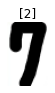

In [21]:
#읽어 들인 데이터 출력하기
for i, pt in enumerate(cnts):
  x, y, w, h = pt
  #윤곽으로 감싼 부분을 작게 만들기
  x+=8
  y+=8
  w-=16
  h-=16
  #이미지 데이터 추출하기
  im2 = img[y:y+h, x: x+w]
  #데이터를 학습에 적합하게 변환하기
  im2gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) #그레이 스케일
  im2gray = cv2.resize(im2gray, (8,8)) #크기 변경
  im2gray = 15- im2gray //16 #이진화
  im2gray = im2gray.reshape((-1,64)) #차원 변환

  #데이터 예측하기
  res = clf.predict(im2gray)

  #출력하기
  plt.subplot(1,7, i+1)
  plt.imshow(im2)
  plt.axis("off")
  plt.title(res)

plt.show()


In [ ]:
#학습이 잘 안된걸까... 결과가 너무 안좋다.